<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Twitter Sentiment Analysis With SVM, Naive Bayes </h1>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:powderblue;
           color:Black;
           font-family:cursive
           ">
<h1 style="text-align:center;font-weight: bold"> Importing Libraries </h1>
</div>


In [ ]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')


In [36]:
df =pd.read_csv(r'../input/twitter-airline-sentiment/Tweets.csv')

In [37]:
# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

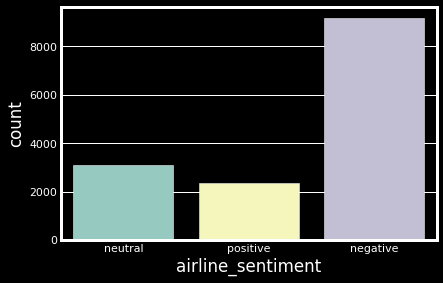

In [38]:
# Unique values of sentiment plot

ax = sns.countplot(x="airline_sentiment", data=df)

> Positive and neutral tweets are almost equal.

> Negative tweets are more than double of neutral or positive sentiments.

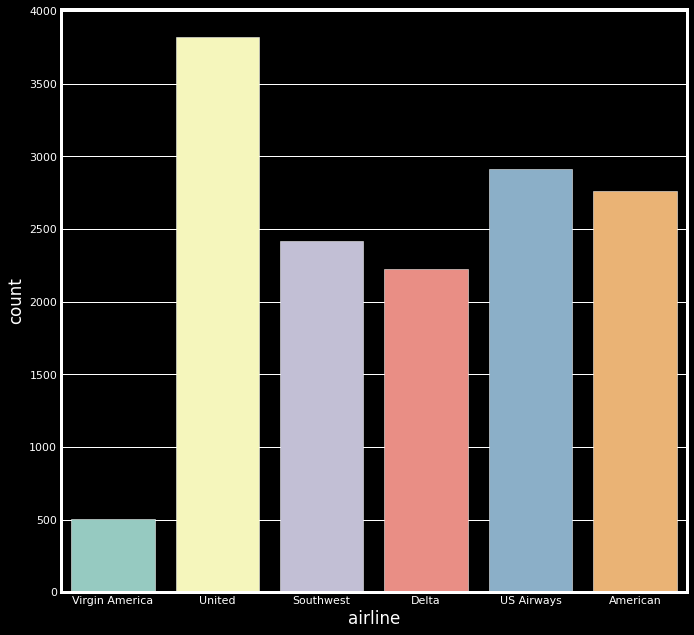

In [39]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)

> United has the most number of flights.

> Virgin America has the least.

In [40]:
# I am tokenizing the tweet and also taking tokins from second index onwards as initital to gives airline name and '@' and lowering thm and later making it back a sentence
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])

                 

def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])


 
def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class)) 
  print() 
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)


  pyplot.plot(lr_recall, lr_precision)
  # axis labels
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()
  print('Are under precision recall curve:', lr_f1)
  print()
  fpr, tpr, _ = roc_curve(y_test, test_probs)
  pyplot.plot(fpr, tpr)
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the legend
  pyplot.legend()
  # show the plot
  pyplot.show()
  print("Area under auc:", lr_auc)



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model
  

In [41]:
# removing neutral tweets

df = df[df['airline_sentiment']!='neutral']
df['cleaned_tweet'] = df['text'].apply(clean_the_tweet)

df.head()
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [42]:
# Cleaning the tweets, removing punctuation marks
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),added commercials experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [43]:
df['airline_sentiment'].unique()

array([1, 0])

# Using count vectorizer

In [44]:
# Creating object of count vectorizer
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(df['cleaned_tweet'])


In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, df['airline_sentiment'], test_size=0.2, random_state=1)


# Base SVM model with CountVectorizer

Train confusion matrix is: 
[[7299   42]
 [ 583 1308]]

Test confusion matrix is: 
[[1807   30]
 [ 238  234]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1837
           1       0.89      0.50      0.64       472

    accuracy                           0.88      2309
   macro avg       0.88      0.74      0.78      2309
weighted avg       0.88      0.88      0.87      2309


Train accuracy score:  0.9323006932409013
Test accuracy score:  0.8839324382849718

Train ROC-AUC score:  0.9897060769577154
Test ROC-AUC score:  0.9321099711209323


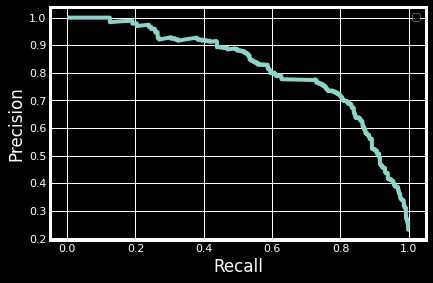

Are under precision recall curve: 0.6358695652173912



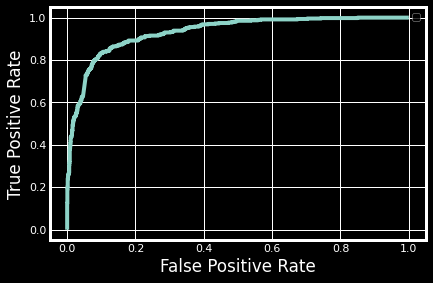

Area under auc: 0.8176616423510765


In [46]:
# Base model
SVM = svm.SVC( probability=True)
check_scores(SVM,x_train, x_test, y_train, y_test)

# After optimizing the hyperparameters with count vectorizer 

In [47]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal_model = grid_search(svm.SVC(probability=True), parameters, x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   6.7s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   6.2s
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=scale, kernel=sigmoid, total=   4.9s
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=scale, kernel=sigmoid, total=   4.8s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ................. C=0.1, gamma=auto, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ................. C=0.1, gamma=auto, kernel=linear, total=   4.2s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  3.2min finished




Best parameters are: 
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


Train confusion matrix is: 
[[7299   42]
 [ 583 1308]]

Test confusion matrix is: 
[[1807   30]
 [ 238  234]]

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1837
           1       0.89      0.50      0.64       472

    accuracy                           0.88      2309
   macro avg       0.88      0.74      0.78      2309
weighted avg       0.88      0.88      0.87      2309


Train accuracy score:  0.9323006932409013
Test accuracy score:  0.8839324382849718

Train ROC-AUC score:  0.9897083821291297
Test ROC-AUC score:  0.932121504294954


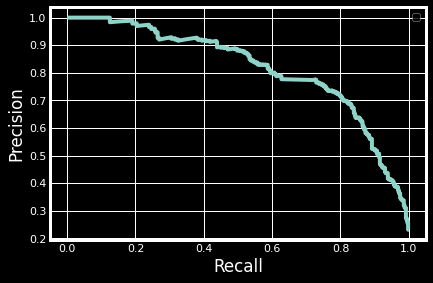

Are under precision recall curve: 0.6358695652173912



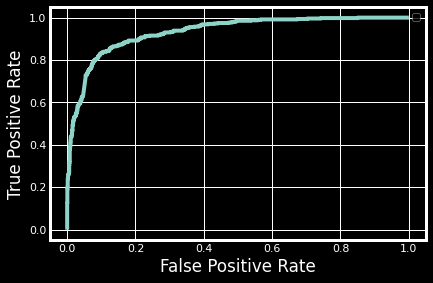

Area under auc: 0.8176677448671721


In [48]:
check_scores(svm_optimal_model,x_train, x_test, y_train, y_test)

# Base SVM model with TF-IDF

In [49]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.cleaned_tweet)
X_train, X_test, y_train, y_test = train_test_split(X_tf_idf, df['airline_sentiment'], random_state=42)


Train confusion matrix is: 
[[6824   31]
 [ 151 1649]]

Test confusion matrix is: 
[[2291   32]
 [ 296  267]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2323
           1       0.89      0.47      0.62       563

    accuracy                           0.89      2886
   macro avg       0.89      0.73      0.78      2886
weighted avg       0.89      0.89      0.87      2886


Train accuracy score:  0.9789716926632005
Test accuracy score:  0.8863478863478863

Train ROC-AUC score:  0.9969059080962801
Test ROC-AUC score:  0.9291042008672256


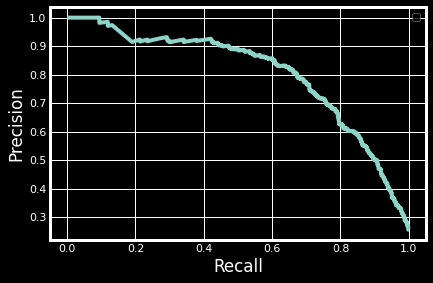

Are under precision recall curve: 0.6194895591647333



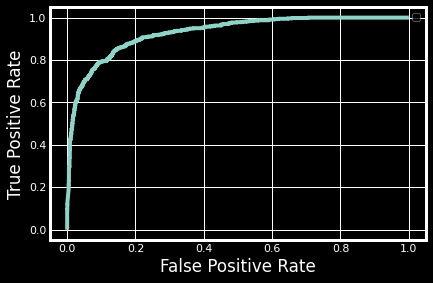

Area under auc: 0.8049623849918863


In [50]:

SVM = svm.SVC( probability=True)
check_scores(SVM,X_train, X_test, y_train, y_test)

> With increase in FPR, TPR also increases.

> With increase in recall, precision decreases.

# After optimizing the hyperparameters with TF-IDF

In [51]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



grid_search(svm.SVC(probability=True), parameters,X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   6.0s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   5.8s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   9.9s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   9.8s
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=scale, kernel=sigmoid, total=   6.0s
[CV] C=0.1, gamma=scale, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=scale, kernel=sigmoid, total=   5.9s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ................. C=0.1, gamma=auto, kernel=linear, total=   6.1s
[CV] C=0.1, gamma=auto, kernel=linear ................................
[CV] ................. C=0.1, gamma=auto, kernel=linear, total=   5.9s
[CV] C=0.1, gamma=auto, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  4.0min finished




Best parameters are: 
{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


SVC(C=10, probability=True)

Train confusion matrix is: 
[[6824   31]
 [ 151 1649]]

Test confusion matrix is: 
[[2291   32]
 [ 296  267]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2323
           1       0.89      0.47      0.62       563

    accuracy                           0.89      2886
   macro avg       0.89      0.73      0.78      2886
weighted avg       0.89      0.89      0.87      2886


Train accuracy score:  0.9789716926632005
Test accuracy score:  0.8863478863478863

Train ROC-AUC score:  0.9969059080962801
Test ROC-AUC score:  0.9291760746080013


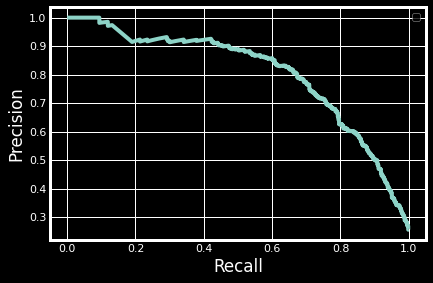

Are under precision recall curve: 0.6194895591647333



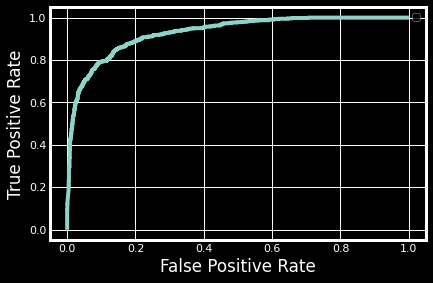

Area under auc: 0.8049810220214707


In [52]:
check_scores(svm_optimal_model,X_train, X_test, y_train, y_test)

> With increase in recall, preciison decreases which makes sense also.

> With increase in TPR, FPR inceases.

# Using Multinomial Naive Bayes

Train confusion matrix is: 
[[6853    2]
 [1296  504]]

Test confusion matrix is: 
[[2318    5]
 [ 474   89]]

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2323
           1       0.95      0.16      0.27       563

    accuracy                           0.83      2886
   macro avg       0.89      0.58      0.59      2886
weighted avg       0.85      0.83      0.78      2886


Train accuracy score:  0.8500288850375506
Test accuracy score:  0.834026334026334

Train ROC-AUC score:  0.9561105438041981
Test ROC-AUC score:  0.9013005324009118


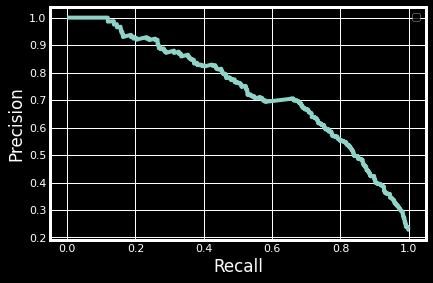

Are under precision recall curve: 0.2709284627092846



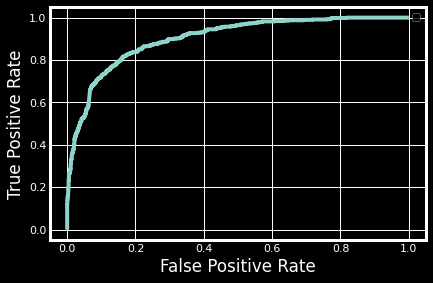

Area under auc: 0.7374839454006489


In [53]:
check_scores(MultinomialNB(),X_train, X_test, y_train, y_test)

# Using Gaussian Naive Bayes

Train confusion matrix is: 
[[5543 1312]
 [   0 1800]]

Test confusion matrix is: 
[[1623  700]
 [ 181  382]]

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      2323
           1       0.35      0.68      0.46       563

    accuracy                           0.69      2886
   macro avg       0.63      0.69      0.63      2886
weighted avg       0.79      0.69      0.72      2886


Train accuracy score:  0.8484113229347198
Test accuracy score:  0.6947331947331947

Train ROC-AUC score:  0.9043034281546316
Test ROC-AUC score:  0.688586755810495


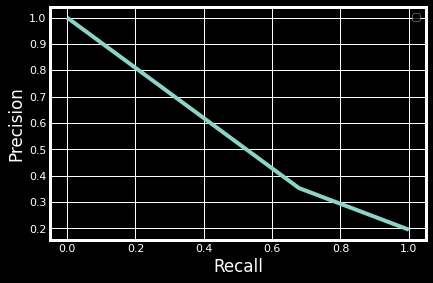

Are under precision recall curve: 0.4644376899696049



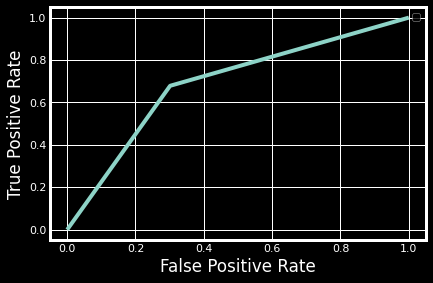

Area under auc: 0.5471372315951626


In [54]:
check_scores(GaussianNB(),X_train.toarray(), X_test.toarray(), y_train, y_test)

> It is interesting to see in Naive Bayes, we are getting linear relationship.